# Three ways to perform polynomial interpolation

In this notebook we will study polynomial interpolation. In particular, we will compute the interpolating polynomial in three ways:

1. using the basis of Lagrange interpolating polynomials;
2. via the built-in function `lagrange` of the `scipy` module;
3. by solving a linear system.

A fourth way, based on *divided differences* is mentioned in the section "Recommended problems".

For more details, see Chapter 17 of 

*Q. Kong, T. Siauw, and A. M. Bayen. Python Programming and Numerical Methods: A Guide for Engineers and Scientists. Academic Press, 2021. (https://pythonnumericalmethods.berkeley.edu/)*

and Section 3.1 of

*Richard L. Burden, J. Douglas Faires and Annette M. Burden. Numerical Analysis (10th Edition). Cengage, 2016.*

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

## The basis of Lagrange interpolating polynomials

Gvien some data $n+1$ distinct point $x_0, \ldots, x_n$, the basis of Lagrange interpolating polynomials $L_{n,0}(x), \ldots, L_{n,n}(x)$ is defined as 
$$
L_{n,k}(x) = \prod_{\substack{j = 0\\j \neq k}}^n \frac{(x-x_j)}{(x_k-x_j)}.
$$
The $k$th Lagrange polynomial $L_{n,k}(x)$ is the only polynomial of degree $n$ such that 
$$
L_{n,k}(x_j) = 
\begin{cases}
1 & \text{if } j = k \\
0 & \text{if } j \neq k
\end{cases}.
$$

For example, consider the data $x_0 = -1$, $x_1 = 0$, $x_2 = 1$. In this case, the basis of Lagrange interpolating polynomials is given by
\begin{align*}
L_{2,0}(x) 
& = \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)} 
= \frac{(x-0)(x-1)}{(-1-0)(-1-1)} 
= \frac12 (x^2 - x)\\
L_{2,1}(x) & 
= \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)} 
= \frac{(x+1)(x-1)}{(0+1)(0-1)} 
= -x^2 + 1 \\
L_{2,2}(x) & 
= \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)} 
= \frac{(x+1)(x-0)}{(1+1)(1-0)} 
= \frac12 (x^2 + x)
\end{align*}
We visualize these polynomials below.

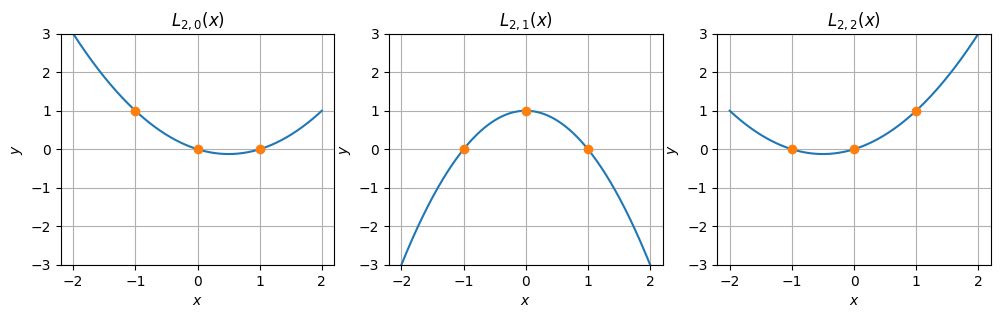

In [2]:
x_data_1 = np.array([-1,0,1]) # Data points x0, x1, x2
id_matrix = np.eye(3)         # Identity matrix 
                              # (each row gives the values of the Lagrange polynomials at the data points)

# Define list of Lagrange interpolating polynomials for n = 2 and the given data
Lagrange_basis = ( lambda x: 0.5 * (x**2 - x), lambda x: -x**2 + 1 , lambda x: 0.5 * (x**2 + x) )  

x_grid_1 = np.linspace(-2,2,1000) # fine grid for visualization purposes

## Creat plots
plt.figure(figsize = (12, 3) )

for k in np.arange(3):
    plt.subplot(1, 3, k+1)
    plt.plot(x_grid_1, Lagrange_basis[k](x_grid_1))
    plt.plot(x_data_1, id_matrix[k, :], 'o')
    plt.grid()
    plt.title('$L_{2,'+str(k)+'}(x)$')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.ylim([-3,3])

plt.show()

## Example \#1: Using the basis functions to built the interpolant

Using the basis just constructed, we can easily build the polynomial of degree at most interpolating the data $(x_0, y_0), \ldots, (x_n, y_n)$ as 
$$
P_n(x) = \sum_{k = 0}^n y_k L_{n,k}(x).
$$
Below we show an example where the function $f(x) = \cos(2 x-3)$ is interpolated at the points $-1,0,1$.

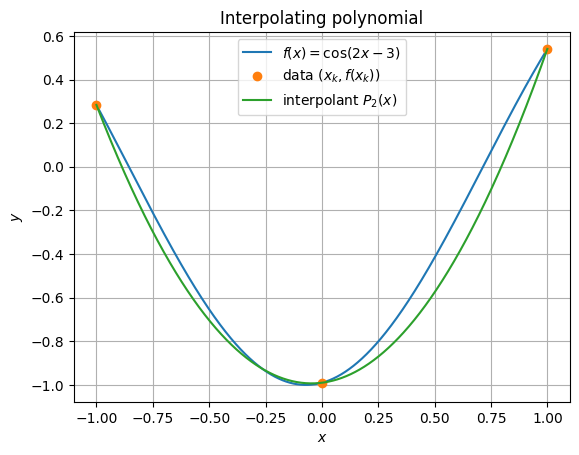

In [3]:
f = lambda x: np.cos(2 * x - 3) # function
y_data_1 = f(x_data_1)          # y data 

# build interpolant from basis
interp_poly_1 = lambda x: y_data_1[0] * Lagrange_basis[0](x) + y_data_1[1] * Lagrange_basis[1](x) + y_data_1[2] * Lagrange_basis[2](x)  

# fine x grdi for visualization
x_grid_1 = np.linspace(-1,1,1001)

# visualize results
plt.plot(x_grid_1, f(x_grid_1), label = '$f(x) = \cos(2x-3)$')
plt.plot(x_data_1, y_data_1, 'o', label = 'data $(x_k, f(x_k))$')
plt.plot(x_grid_1, interp_poly_1(x_grid_1), label = 'interpolant $P_2(x)$')
plt.grid()
plt.title('Interpolating polynomial')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()

plt.show()

## Example \#2: The built-in function `lagrange` 

A convenient way to compute interpolating polynomials in Python is using the built-in function `lagrange` from the `scipy` module. Here we test this function by interpolating random data on an equispaced grid. 

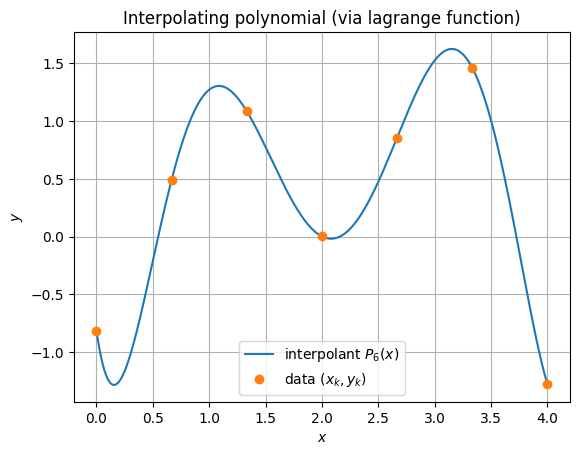

In [4]:
# import lagrange function from scipy
from scipy.interpolate import lagrange

n = 6          # polynomial degree
(a, b) = (0, 4) # interval
x_data_2 = np.linspace(a,b,n+1) # x data form an equispaced grid on [-1,1]
y_data_2 = np.random.randn(n+1)  # y data are generated as random Gaussian N(0,1) samples

x_grid_2 = np.linspace(a,b,1001) # fine grid used for visualization purposes

interp_poly_2 = lagrange(x_data_2, y_data_2) # compute interpolant with built-in function


# visualize results
plt.plot(x_grid_2, interp_poly_2(x_grid_2), label = 'interpolant $P_{'+str(n)+'}(x)$' )
plt.plot(x_data_2, y_data_2, 'o', label = 'data $(x_k, y_k)$')
plt.grid()
plt.title('Interpolating polynomial (via lagrange function)')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()

plt.show()

## Example \#2 revisited: solving a linear system

An alternative way to compute the interpolating polynomial is by solving a linear system. First expand the polynomial in the basis of monomials
$$
P_n(x) = \sum_{k = 0}^n c_k x^k,
$$
then solve the linear system obtained by enforcing the conditions $P_n(x_k) = y_k$ for $k = 0,\ldots, n$, i.e.
$$
M c = y,
$$
where $y = (y_k)_{k = 0}^n$, $c = (c_k)_{k =0}^n$ and the $(n+1) \times (n+1)$ matrix $M$ is defined by 
$$
M_{j,k} = x_{j}^{k}, \quad \forall j,k = 0, \ldots, n,
$$
(row and column indices start from $0$). This is called a *Vandermonde matrix* (see, e.g., https://en.wikipedia.org/wiki/Vandermonde_matrix).

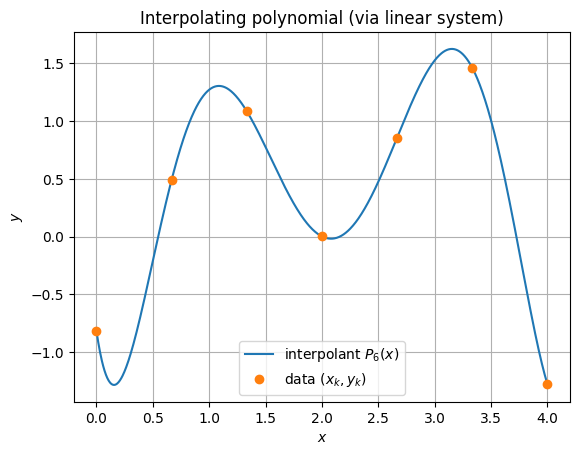

In [5]:
# Create Vandermonde matrix
M = np.zeros((n+1,n+1))
for j in np.arange(n+1):
    for k in np.arange(n+1):
        M[j,k] = x_data_2[j]**k

# Solve linear system to compute polynomial coefficients
coeff = np.linalg.solve(M,y_data_2.T) 

# create function that evaluates polynomial with given coefficients 
def interp_poly_2_lin_sys(coeff, x):
    y = x * 0;
    for k in np.arange(len(coeff)):
        y = y + coeff[k] * x**k
    return y

# visualize results
plt.plot(x_grid_2, interp_poly_2_lin_sys(coeff, x_grid_2), label = 'interpolant $P_{'+str(n)+'}(x)$' )
plt.plot(x_data_2, y_data_2, 'o', label = 'data $(x_k, y_k)$')
plt.grid()
plt.title('Interpolating polynomial (via linear system)')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()

plt.show()

## Recommended problems

1. In the first example, numerically estimate the approximation error
   $$
   \max_{x \in[a,b]} |f(x) - P_n(x)|.
   $$
   Then, compare your estimate with a theoretical estimate obtained using the reminder formula
   $$
   f(x) = P_{n}(x) + \frac{f^{(n+1)}(\xi(x))}{(n+1)!} \prod_{j=0}^n (x-x_j).
   $$
   
   
3. Try to increase the polynomial degree in the `lagrange` function example. You should observe the following.
  
   a) For moderately high degree (i.e., $n$ between 10 and 20), the interpolating polynomial exhibits highly oscillatory behavior close to the interval's extrema. This is called *Runge's phenomenon*.
  
   b) For very high degree (i.e., $n \geq 25$) you should observe numerical instabilities due to the implementaiton of the function `lagrange`

      Note that the second phenenon is observed for higher degrees when solving the Vandermonde system.

4. An efficient method for the fast computation of interpolating polynomials is given by recursive formulas based on *divided differences*.

   For more details and an implementation of this method, see Section 17.5 of 

   *Q. Kong, T. Siauw, and A. M. Bayen. Python Programming and Numerical Methods: A Guide for Engineers and Scientists. Academic Press, 2021. (https://pythonnumericalmethods.berkeley.edu/)*

   and Section 3.3 of

   *Richard L. Burden, J. Douglas Faires and Annette M. Burden. Numerical Analysis (10th Edition). Cengage, 2016.*